# Auto reload modules

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import scripts.missing as missing
import missingno as msno
import pandas as pd
import numpy as np
import fs

In [24]:
MAIN_DIR = fs.open_fs("../../data/raw/project")
CSV_DIR = MAIN_DIR.getsyspath("car_dataframe.csv")

ITNERIM_DIR = fs.open_fs("../../data/interim/project")
CARS_CLEAN_CSV_DIR = ITNERIM_DIR.getsyspath("car_dataframe_clean.csv")

df = pd.read_csv(CSV_DIR)

In [25]:
df

,fuel_consumption_km_l,traccion,transmision,horsepower,fuel_type,displacement,gears,engine_type,torque,turbo,brand,age
0,7,4x2,Automático,449,estándar,3.0,7,Combustión,516,Sí,Mercedes Benz,9
1,10,4x4,Automático,310,estándar,3.0,8,Combustión,325,Sí,Audi,7
2,11,4x4,Automático,300,estándar,2.0,8,Combustión,295,Sí,Jaguar Xe,6
3,17,4x2,Automático,150,estándar,1.4,7,Combustión,148,Sí,Seat,6
4,12,4x4,Automático,320,Gasolina,2.0,8,Combustión,295,Sí,Volvo,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1872,14,4x2,Manual,100,Gasolina,1.6,5,Combustión,105,No,Volkswagen,9
1873,14,4x2,Manual,105,estándar,1.6,5,Combustión,107,No,Renault,7
1874,15,4x2,Manual,115,NoInfo,NaN,0,NoInfo,114,No,Chevrolet,8
1875,9,4x4,Automático,285,estándar,NaN,0,NoInfo,300,No,Lincoln,9


In [26]:
(
    df
    .select_dtypes(object)
    .apply(pd.unique)
)

traccion                                              [4x2, 4x4]
transmision                                 [Automático, Manual]
fuel_type      [estándar, Gasolina, Híbrido, Eléctrico, Diese...
engine_type    [Combustión, Eléctrico, Híbrido, Mild Hybrid, ...
turbo                                                   [Sí, No]
brand          [Mercedes Benz, Audi, Jaguar Xe, Seat, Volvo, ...
dtype: object

In [27]:
df['fuel_type'].unique()

array(['estándar', 'Gasolina', 'Híbrido', 'Eléctrico', 'Diesel', 'NoInfo'],
      dtype=object)

In [28]:
df['engine_type'].unique()

array(['Combustión', 'Eléctrico', 'Híbrido', 'Mild Hybrid', 'NoInfo',
       'Motor Supercargado'], dtype=object)

In [29]:
df = (
    df
    .replace(
        to_replace=[0,'NoInfo'],
        value=np.nan
    )
        .replace(
        to_replace=['estándar'],
        value='Estándar'
    )
)

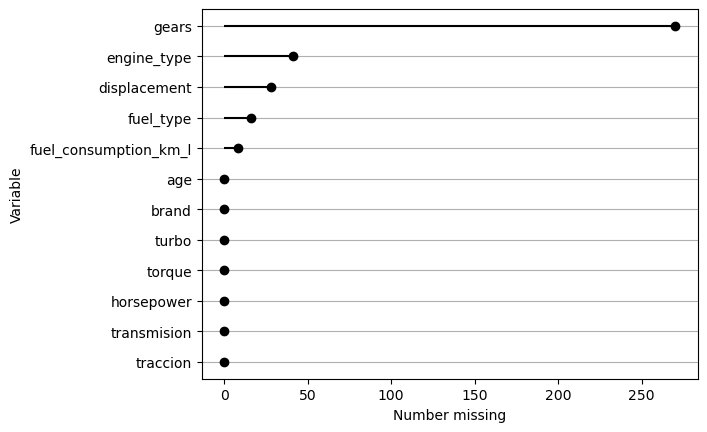

In [30]:
df.missing.missing_variable_plot()

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


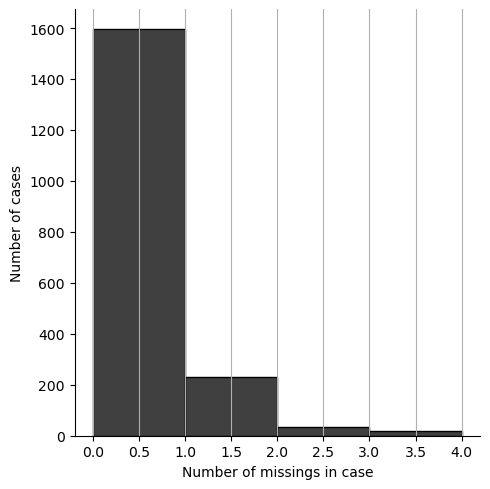

In [31]:
df.missing.missing_case_plot()

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

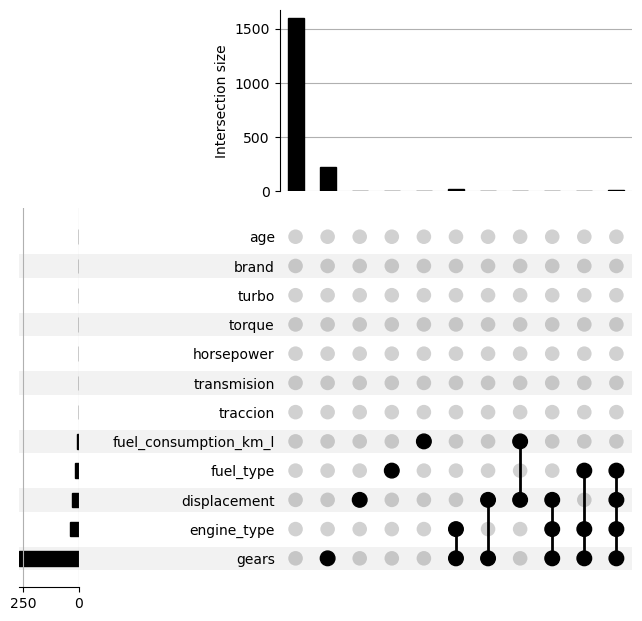

In [32]:
(
    df
    .missing
    .missing_upsetplot(
        variables = None, 
        element_size = 30
    )
)

In [33]:
df.shape

(1877, 12)

In [34]:
df = df.dropna().drop_duplicates()

In [35]:
df.shape

(1196, 12)

In [36]:
df.to_csv(CARS_CLEAN_CSV_DIR, encoding='utf-8', index=False)